# Pandas

## 핵심 기능들

### 축으로 항목 제거

In [9]:
시 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
시

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [10]:
새시 = 시.drop('c')
새시

a    0
b    1
d    3
e    4
dtype: int64

In [11]:
시.drop(['a', 'c'])

b    1
d    3
e    4
dtype: int64

In [15]:
프 = pd.DataFrame(np.arange(3 * 3).reshape(3, 3), index=['ㄱ', 'ㄴ', 'ㄷ'], columns=['A', 'B', 'C'])
프

,A,B,C
ㄱ,0,1,2
ㄴ,3,4,5
ㄷ,6,7,8


In [14]:
프 = pd.DataFrame(range(9).reshape(3,3), index = ['ㄱ','ㄴ','ㄷ'], columes = ['A','B','C'])
프

AttributeError: 'range' object has no attribute 'reshape'

In [16]:
프.drop('ㄱ')

,A,B,C
ㄴ,3,4,5
ㄷ,6,7,8


In [17]:
프.drop(['A', 'B'], axis='columns')

,C
ㄱ,2
ㄴ,5
ㄷ,8


In [18]:
프

,A,B,C
ㄱ,0,1,2
ㄴ,3,4,5
ㄷ,6,7,8


`inplace=` 인자를 통해서 원래 자료를 변경할 수 있다.

In [19]:
프.drop(['ㄱ'], inplace=True)
프

,A,B,C
ㄴ,3,4,5
ㄷ,6,7,8


### 인덱싱, 선택, 여과

넘파이 인덱싱할 때와 마찬가지로 시리즈 인덱싱은 대괄호 []를 사용하는 것은 같지만 시리즈 인덱싱에서는 인덱스 항목을 사용할 수 있다는 점이 다르다.

In [20]:
시 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
시

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [21]:
시[1]

1

In [22]:
시['b']

1

In [23]:
시[1:3]

b    1
c    2
dtype: int64

In [24]:
시['b':'v']

b    1
c    2
d    3
e    4
dtype: int64

In [25]:
시['c':'d'] = 0
시

a    0
b    1
c    0
d    0
e    4
dtype: int64

In [26]:
프 = pd.DataFrame(np.arange(3 * 4).reshape(3, 4), index=['A', 'B', 'C'], columns=['가', '나', '다', '라'])
프

,가,나,다,라
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


**하나의 열이름**을 통해 접근하면 반환되는 유형은 **시리즈**이고   
**리스트**로 접근하면 **데이터프레임**이 반환된다.

In [27]:
프['가']

A    0
B    4
C    8
Name: 가, dtype: int32

In [28]:
type(프['가'])

pandas.core.series.Series

In [29]:
프[['가','다']]

,가,다
A,0,2
B,4,6
C,8,10


In [30]:
프['가','다']

KeyError: ('가', '다')

In [31]:
프[:2]

,가,나,다,라
A,0,1,2,3
B,4,5,6,7


In [32]:
프['A':'C']

,가,나,다,라
A,0,1,2,3
B,4,5,6,7
C,8,9,10,11


논리 인덱스는 기본적으로 행에 대해서 접근한다.

In [33]:
프[프['가'] <= 4]

,가,나,다,라
A,0,1,2,3
B,4,5,6,7


In [34]:
프 < 6

,가,나,다,라
A,True,True,True,True
B,True,True,False,False
C,False,False,False,False


In [35]:
프[프 < 6] = 0
프

,가,나,다,라
A,0,0,0,0
B,0,0,6,7
C,8,9,10,11


### loc 및 iloc를 이용한 선택

행, 열 이름을 가지고 할 수 있는 것이 **loc**이고   
정수를 가지고 인덱싱을 하는 것이 **iloc**이다.

In [36]:
프.loc['B', ['가', '다']]

가    0
다    6
Name: B, dtype: int32

In [37]:
프.iloc[:2, [3, 0, 1]]

,라,가,나
A,0,0,0
B,7,0,0


In [38]:
프.iloc[2]

가     8
나     9
다    10
라    11
Name: C, dtype: int32

In [39]:
프.loc['A':'B', ['다', '가']]

,다,가
A,0,0
B,6,0


### 정수 인덱스

In [40]:
시1 = pd.Series(range(3))
시1

0    0
1    1
2    2
dtype: int64

정수 기반 인덱스를 사용할 때는 위치 인덱스로 접근하는 것을 허용하지 않는다.  
파이썬 인덱스에서 -1은 가장 마지막 항목을 의미한다. 하지만 판다스는 정수형 인덱스를 이름으로 가지면 오류를 발생한다.

In [41]:
시1[-1]

KeyError: -1

인덱스 이름이 정수형이 아닐 때는 문제없이 작동한다.

In [42]:
시2 = pd.Series(range(3), index=['a', 'b', 'c'])
시2

a    0
b    1
c    2
dtype: int64

In [43]:
시2[-1]

2

### 산술 연산

In [2]:
import pandas as pd
시1 = pd.Series(range(5), index = ['ㄱ','ㄴ','ㄷ','ㄹ','ㅂ'])
시1

ㄱ    0
ㄴ    1
ㄷ    2
ㄹ    3
ㅂ    4
dtype: int64

In [6]:
시2 = pd.Series(range(1,10,2), index = ['ㄱ','ㄴ','ㄷ','ㅁ','ㅅ'])
시2

ㄱ    1
ㄴ    3
ㄷ    5
ㅁ    7
ㅅ    9
dtype: int64

인덱스 이름이 겹치지 않으면 각 개체는 소실값을 설정하고 연산을 한다.

In [7]:
시1+시2

ㄱ    1.0
ㄴ    4.0
ㄷ    7.0
ㄹ    NaN
ㅁ    NaN
ㅂ    NaN
ㅅ    NaN
dtype: float64

In [9]:
import numpy as np
데1 = pd.DataFrame(np.arange(3 * 3).reshape(3, 3), columns=list('ㄱㄴㄷ'), index=['가', '다', '라'])
데1

,ㄱ,ㄴ,ㄷ
가,0,1,2
다,3,4,5
라,6,7,8


In [10]:
데2 = pd.DataFrame(np.arange(4 * 3).reshape(4, 3), columns=list('ㄱㄷㄹ'), index=['나', '다', '라', '마'])
데2

,ㄱ,ㄷ,ㄹ
나,0,1,2
다,3,4,5
라,6,7,8
마,9,10,11


In [12]:
데1 + 데2

,ㄱ,ㄴ,ㄷ,ㄹ
가,NaN,NaN,NaN,NaN
나,NaN,NaN,NaN,NaN
다,6.0,NaN,9.0,NaN
라,12.0,NaN,15.0,NaN
마,NaN,NaN,NaN,NaN


### 산술 연산 및 소실값 채우기

`fill_value=` 인자를 이용해 소실값을 채운다.  
단, 두 객체 성분이 동시에 소실값을 가지면 `fill_value`를 채우지 않고 `np.nan`을 유지한다.

In [13]:
데1 = pd.DataFrame(np.arange(3 * 4).reshape(3, 4), columns=list('abcd'))
데1.loc[0, 'c'] = np.nan
데1

,a,b,c,d
0,0,1,NaN,3
1,4,5,6.0,7
2,8,9,10.0,11


In [14]:
데2 = pd.DataFrame(np.arange(4 * 5).reshape(4, 5), columns=list('abcde'))
데2.loc[1, 'b'] = np.nan
데2.loc[0, 'c'] = np.nan
데2

,a,b,c,d,e
0,0,1.0,NaN,3,4
1,5,NaN,7.0,8,9
2,10,11.0,12.0,13,14
3,15,16.0,17.0,18,19


In [16]:
# 두 객체가 겹치지 않는 부분은 소실값으로 대체되어 계산된다.
데1 + 데2

,a,b,c,d,e
0,0.0,2.0,NaN,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


더하기 +는 대응되는 메소드 `add`를 사용하여 계산할 수 있다. 그리고 `fill_value=` 인자를 사용하여 둘 중의 하나가 `NA`인 값을 `fill_value`값으로 채우고 연산을 한다.

In [18]:
데1.add(데2, fill_value = 100)
# 둘 다 NaN인 (0, 'c') 성분은 fill_value 값으로 대체되지 않는 것을 알 수 있다.

,a,b,c,d,e
0,0.0,2.0,NaN,6.0,104.0
1,9.0,105.0,13.0,15.0,109.0
2,18.0,20.0,22.0,24.0,114.0
3,115.0,116.0,117.0,118.0,119.0


스칼라 나눗셈에 대한 연산도 `rdiv` 메소드를 이용할 수 있다.

In [19]:
1/데1

,a,b,c,d
0,inf,1.000000,NaN,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [20]:
데1.rdiv(1)

,a,b,c,d
0,inf,1.000000,NaN,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


### 데이터프레임과 시리즈 연산

In [21]:
데 = pd.DataFrame(np.arange(3 * 4).reshape(3, 4), columns=list('abcd'), index=list('ㄱㄴㄷ'))
데

,a,b,c,d
ㄱ,0,1,2,3
ㄴ,4,5,6,7
ㄷ,8,9,10,11


In [22]:
시1 = 데.iloc[0]
시1

a    0
b    1
c    2
d    3
Name: ㄱ, dtype: int32

두 객체의 더하기는 데이터프레임의 각 행과 시리즈의 더하기가 된다. 여기서 사용되는 방법이 브로드캐스팅이다.   
즉, 차원이 다른 두 객체를 일정한 규칙을 만족하도록 낮은 차원 객체를 높은 차원 객체와 같은 크기를 만든다.

In [24]:
데+시1

,a,b,c,d
ㄱ,0,2,4,6
ㄴ,4,6,8,10
ㄷ,8,10,12,14


In [25]:
시2 = 데['a']
시2

ㄱ    0
ㄴ    4
ㄷ    8
Name: a, dtype: int32

데이터프레임의 열과 시리즈와 연산을 하려면 axis='index' 또는 axis=0를 사용한다.

In [27]:
데.add(시2, axis='index')

,a,b,c,d
ㄱ,0,1,2,3
ㄴ,8,9,10,11
ㄷ,16,17,18,19


In [28]:
데.add(시2, axis=0)

,a,b,c,d
ㄱ,0,1,2,3
ㄴ,8,9,10,11
ㄷ,16,17,18,19


### 함수 사용 및 대응

판다스는 넘파이 범용 함수를 사용할 수 있다

In [2]:
import numpy as np
import pandas as pd
rng = np.random.RandomState(1234)

데 = pd.DataFrame(rng.randn(3*4).reshape(3,4), columns = list('abcd')
                 , index = list('ㄱㄴㄷ'))
데

,a,b,c,d
ㄱ,0.471435,-1.190976,1.432707,-0.312652
ㄴ,-0.720589,0.887163,0.859588,-0.636524
ㄷ,0.015696,-2.242685,1.150036,0.991946


In [3]:
np.abs(데)

,a,b,c,d
ㄱ,0.471435,1.190976,1.432707,0.312652
ㄴ,0.720589,0.887163,0.859588,0.636524
ㄷ,0.015696,2.242685,1.150036,0.991946


데이터프레임의 행 또는 열벡터에 적용할 수 있는 `apply` 메소드가 있다.

In [4]:
f = lambda x : x.max()-x.min()

데.apply(f)

a    1.192024
b    3.129848
c    0.573119
d    1.628470
dtype: float64

In [5]:
데.apply(f, axis = 'columns')

ㄱ    2.623683
ㄴ    1.607752
ㄷ    3.392721
dtype: float64

In [6]:
def g(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
데.apply(g)

,a,b,c,d
min,-0.720589,-2.242685,0.859588,-0.636524
max,0.471435,0.887163,1.432707,0.991946


4x5 데이터프레임을 하나 만들고 각 행과 열에 대해서 합과 평균을 반환하는 코드를 작성하시오.

In [8]:
데5 = pd.DataFrame(rng.randn(4*5).reshape(4,5))
데5

,0,1,2,3,4
0,0.953324,-2.021255,-0.334077,0.002118,0.405453
1,0.289092,1.321158,-1.546906,-0.202646,-0.655969
2,0.193421,0.553439,1.318152,-0.469305,0.675554
3,-1.817027,-0.183109,1.058969,-0.397840,0.337438


In [10]:
def h(x):
    return pd.Series([x.mean()], index=['mean'])
데5.apply(h)

,0,1,2,3,4
mean,-0.095297,-0.082442,0.124034,-0.266918,0.190619


In [12]:
포맷2 = lambda x : pd.Series([x.sum()], index=['sum'])
데5.apply(포맷2)

,0,1,2,3,4
sum,-0.38119,-0.329766,0.496138,-1.067673,0.762476


`applymap` 메소드를 이용하면 성분에 대한 연산을 하는 함수를 사용할 수 있다.   
다음과 같이 각 성분 숫자를 소수점 2자리만 표시되는 함수를 만들어 보자.

In [13]:
포맷 = lambda x : '{:.2f}'.format(x)

데5.applymap(포맷)

,0,1,2,3,4
0,0.95,-2.02,-0.33,0.00,0.41
1,0.29,1.32,-1.55,-0.20,-0.66
2,0.19,0.55,1.32,-0.47,0.68
3,-1.82,-0.18,1.06,-0.40,0.34


**format?**
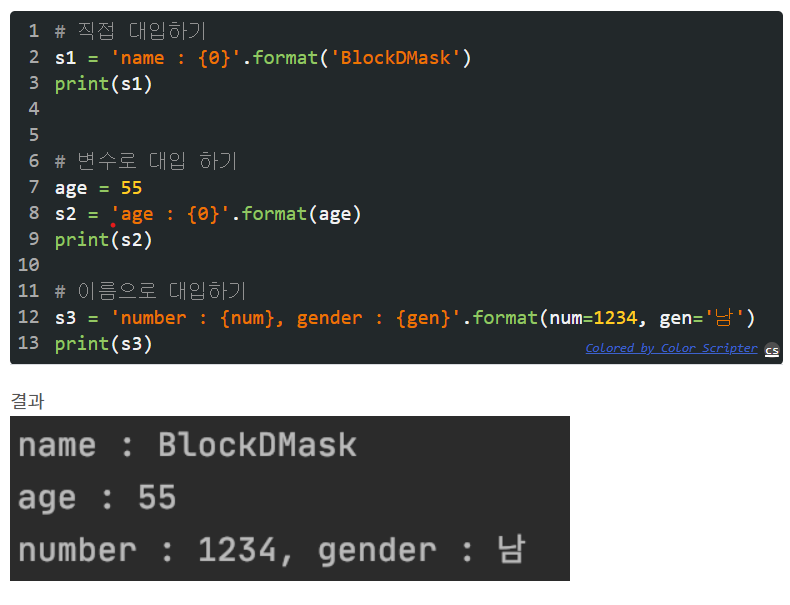

In [14]:
데['a'].map(포맷)

ㄱ     0.47
ㄴ    -0.72
ㄷ     0.02
Name: a, dtype: object

### 정렬 및 순위

행 또는 열이름에 대해서 자료를 정렬하려면 `sort_index` 메소드를 사용하면 된다.

In [15]:
프 = pd.DataFrame(np.arange(3 * 4).reshape(3, 4), columns=list('ㄴㄱㄹㄷ'), index=list('dab'))
프

,ㄴ,ㄱ,ㄹ,ㄷ
d,0,1,2,3
a,4,5,6,7
b,8,9,10,11


In [16]:
프.sort_index()

,ㄴ,ㄱ,ㄹ,ㄷ
a,4,5,6,7
b,8,9,10,11
d,0,1,2,3


In [18]:
프.sort_index(axis=1)

,ㄱ,ㄴ,ㄷ,ㄹ
d,1,0,3,2
a,5,4,7,6
b,9,8,11,10


In [19]:
프.sort_index(axis=1, ascending = False)

,ㄹ,ㄷ,ㄴ,ㄱ
d,2,3,0,1
a,6,7,4,5
b,10,11,8,9


In [20]:
시 = pd.Series([12, -2, 0, -9])
시

0    12
1    -2
2     0
3    -9
dtype: int64

시리즈 값에 의한 정렬을 원하면 `sort_values` 메소드를 사용한다.

In [21]:
시.sort_values()

3    -9
1    -2
2     0
0    12
dtype: int64

소실값이 포함되어 있으면 기본적으로 소실값은 자료의 맨 나중에 정렬된다.

In [22]:
시1 = pd.Series([10, np.nan, -2, np.nan, -3])
시1.sort_values()

4    -3.0
2    -2.0
0    10.0
1     NaN
3     NaN
dtype: float64

데이터프레임의 경우, 특정한 열에 대한 정렬을 원하면 `by=열이름` 인자를 사용하면 된다.

In [23]:
프1 = pd.DataFrame({'a': [-2, 3, -5, 1], 'b': [20, -29, 40, 20]})
프1

,a,b
0,-2,20
1,3,-29
2,-5,40
3,1,20


In [24]:
프1.sort_values(by='a')

,a,b
2,-5,40
0,-2,20
3,1,20
1,3,-29


In [25]:
프1.sort_values(by=['b', 'a'])

,a,b
1,3,-29
0,-2,20
3,1,20
2,-5,40


순위(ranking)는 자료의 순서대로 순위를 표시한다.  
같은 순위가 있을 경우 `method=` 인자에 적용되는 방법에 의해 순위를 정한다.  

`method` 기본값은 average로 같은 숫자들의 순위의 평균을 구하는 것이다.   


`method=first` 값을 사용하면 자료의 위치가 앞에 있는 것이 앞 순위가 된다.

In [27]:
시.rank(method='first')

0    4.0
1    2.0
2    3.0
3    1.0
dtype: float64

In [28]:
프 = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})
프

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [29]:
프.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 중복 이름을 가진 인덱스

In [30]:
시 = pd.Series(np.arange(5), index=list('abcda'))
시

a    0
b    1
c    2
d    3
a    4
dtype: int32

In [31]:
시['a']
# 반환값 시리즈형

a    0
a    4
dtype: int32

In [32]:
시['b']
# 반환값 스칼라

1

In [34]:
시.index.is_unique  #인덱스가 유일한지 아닌지를 판단

False

In [35]:
데 = pd.DataFrame(np.arange(3 * 4).reshape(3, 4), index=list('aba'))
데

,0,1,2,3
a,0,1,2,3
b,4,5,6,7
a,8,9,10,11


In [36]:
데.loc['a']

,0,1,2,3
a,0,1,2,3
a,8,9,10,11
